# Exercices 13, 14

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_steps = 55
dt = 1 / 100
space_steps = 100
dh = 1 / space_steps
eps = 1e-3
u = np.ones((space_steps, space_steps, time_steps))*np.nan

def u_x(u_, x_i, y_i, t_i, h):
    #print(u_[x_i+1, y_i, t_i], u_[x_i-1, y_i, t_i])
    return (u_[x_i+1, y_i, t_i] - u_[x_i-1, y_i, t_i]) / (2*h)

def u_y(u_, x_i, y_i, t_i, h):
    return (u_[x_i, y_i+1, t_i] - u_[x_i, y_i-1, t_i]) / (2*h)

def u_xx(u_, x_i, y_i, t_i, h):
    return (u_[x_i+1, y_i, t_i] - 2*u_[x_i, y_i, t_i] + u_[x_i-1, y_i, t_i]) \
           / (h**2)

def u_yy(u_, x_i, y_i, t_i, h):
    return (u_[x_i, y_i+1, t_i] - 2*u_[x_i, y_i, t_i] + u_[x_i, y_i-1, t_i]) \
           / (h**2)

def u_xy(u_, x_i, y_i, t_i, h):
    return (u_[x_i+1, y_i+1, t_i] + u_[x_i-1, y_i-1, t_i] - 
            u_[x_i+1, y_i-1, t_i] - u_[x_i-1, y_i+1, t_i]) \
           / (h**2)

# Bounded domain is [-1, 1]^2
def f_square(xy):
    xv_, yv_ = xy
    return np.maximum(np.abs(xv_), np.abs(yv_))

def f_circle_(xy):
    xv_, yv_ = xy
    return (xv_**2 + yv_**2 <= 1).astype(int)

def f_circle(xy):
    xv_, yv_ = xy
    return xv_**2 + yv_**2

def get_coords(xy, path):
    xv_, yv_ = xy
    return np.squeeze([np.argwhere((xv==coord[0]) & (yv==coord[1])) for coord in path])

In [77]:
xx = np.linspace(-1, 1, space_steps)
yy = np.linspace(-1, 1, space_steps)
xv, yv = np.meshgrid(xx, yy)
"""
xx_circle = np.linspace(0, 2*np.pi, space_steps)
yy_circle = np.linspace(0, 1.5, space_steps)
xv_circle, yv_circle = np.meshgrid(xx, yy)
"""

'\nxx_circle = np.linspace(0, 2*np.pi, space_steps)\nyy_circle = np.linspace(0, 1.5, space_steps)\nxv_circle, yv_circle = np.meshgrid(xx, yy)\n'

In [80]:
# Square
# Initial Condition (time) of the function u
for x_i, y_i in np.argwhere(f_square((xv, yv)) == 1):  # get_coords((xv, yv), set_square.allsegs[0][0]):
        u[x_i, y_i, 0] = 1
for x_i, y_i in np.argwhere(f_square((xv, yv)) != 1):  # get_coords((xv, yv), set_square.allsegs[0][0]):
        u[x_i, y_i, 0] = 0

# Boundary Condition (space) of the function u
for t_i in range(1, time_steps):
    for x_i, y_i in np.argwhere(f_square((xv, yv)) == 1):  # in get_coords((xv, yv), set_square.allsegs[0][0]):
            u[x_i, y_i, t_i] = 0

In [81]:
u[:, :, 0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

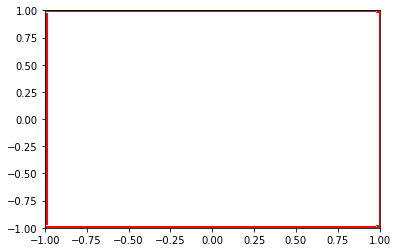

In [82]:
plt.clf()
plt.contourf(xv, yv, np.nan_to_num(u[:, :, 0]), colors=('w','r'), extend='min')
plt.show()

0


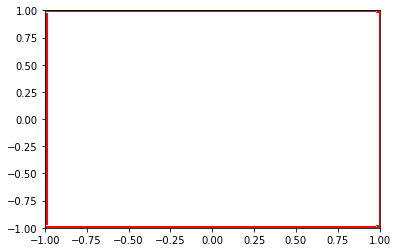

1


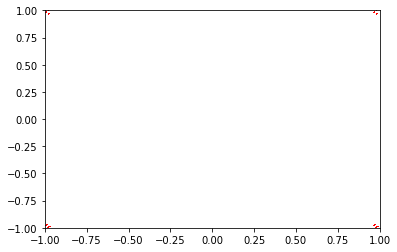

2


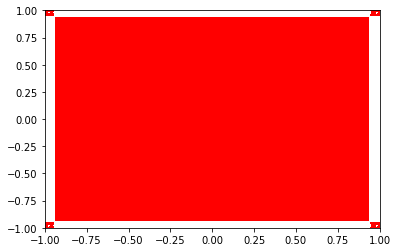

3


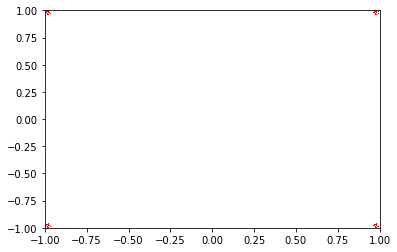

4


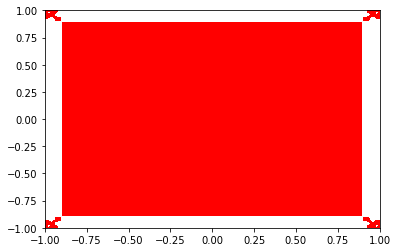

5


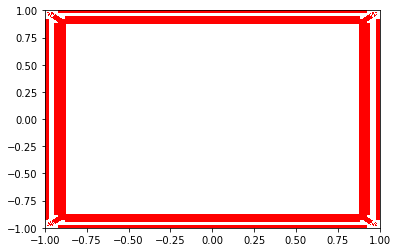

6


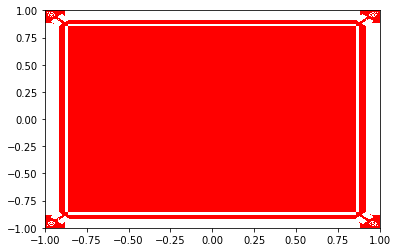

7


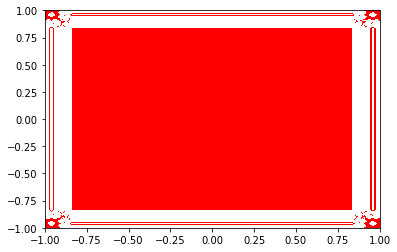

8


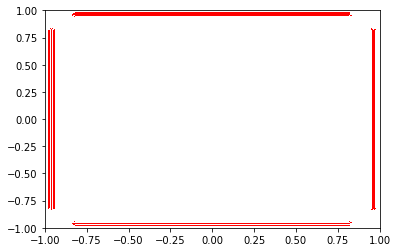

9


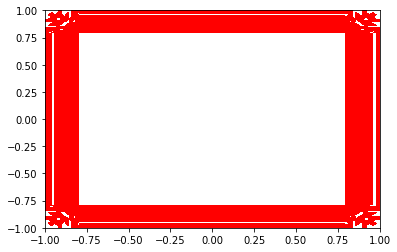

10


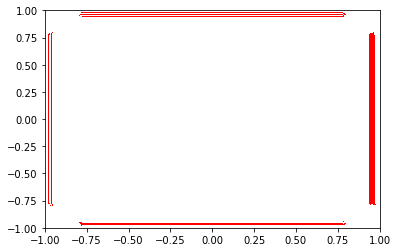

11


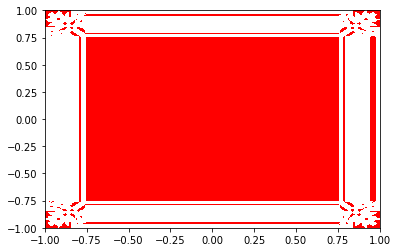

12


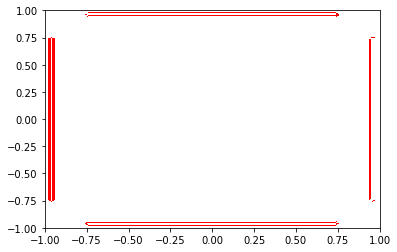

13


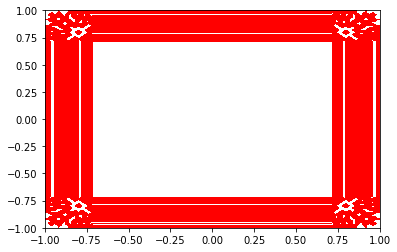

14


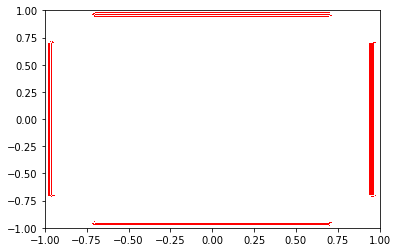

15


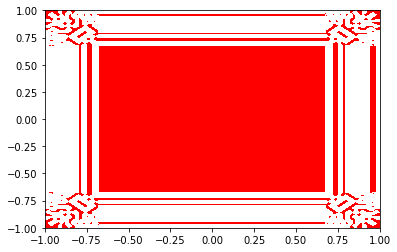

16


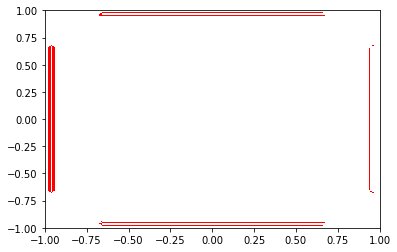

17


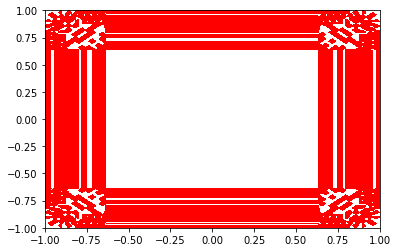

18


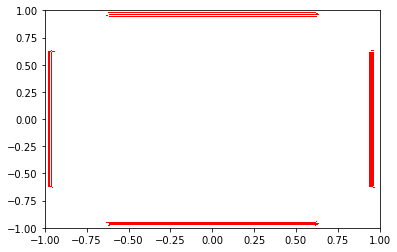

19


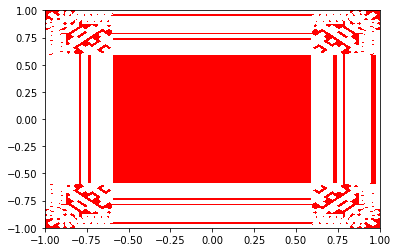

20


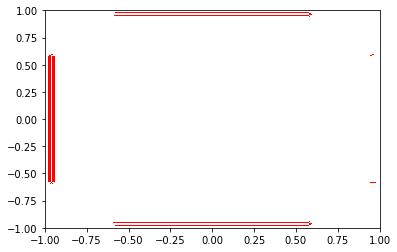

21


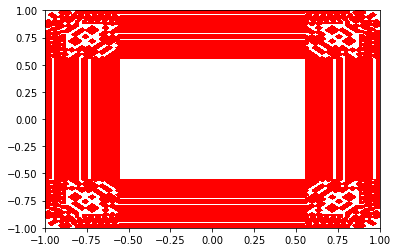

22


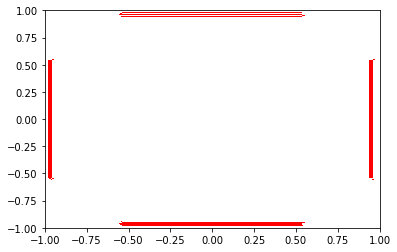

23


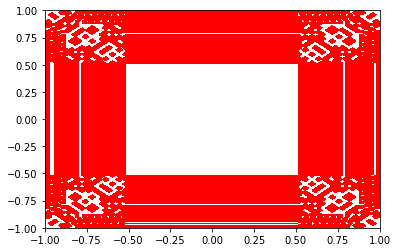

24


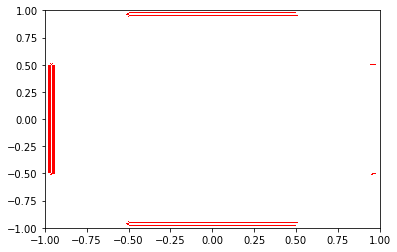

25


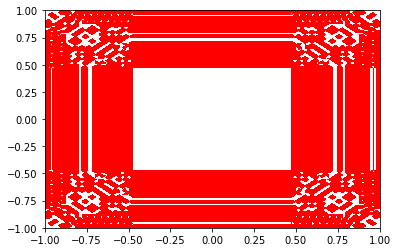

26


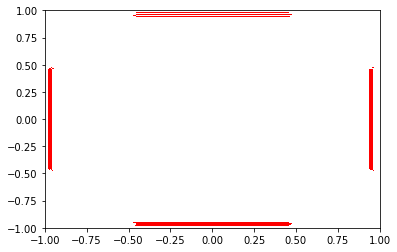

27


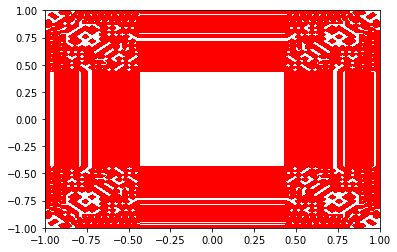

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


28


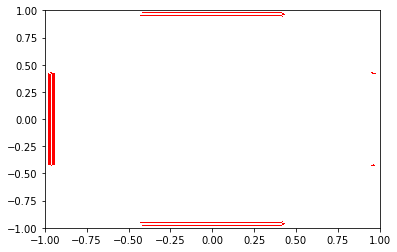

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


29


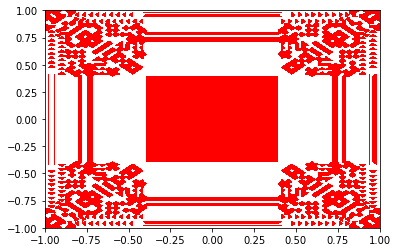

30


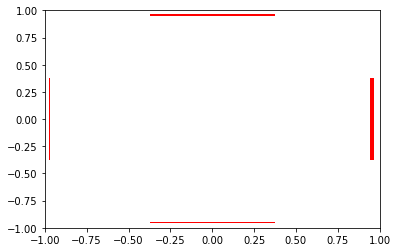

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars


31


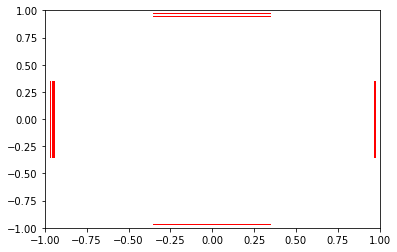

32


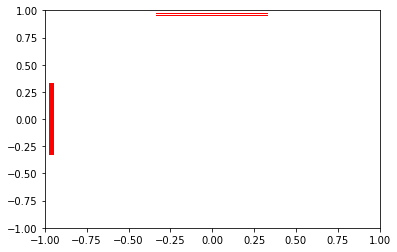

33


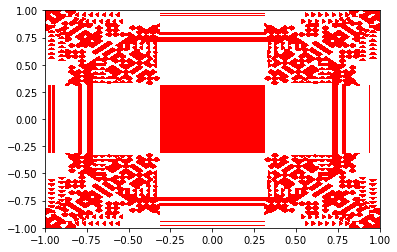

34


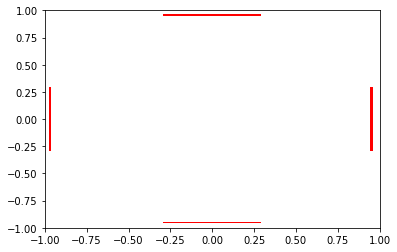

35


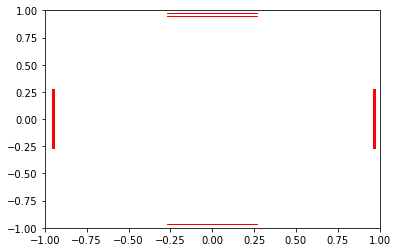

36


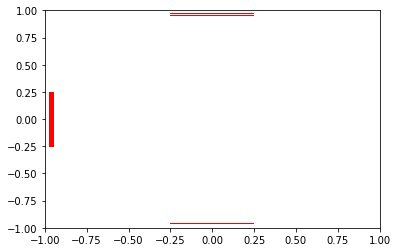

37


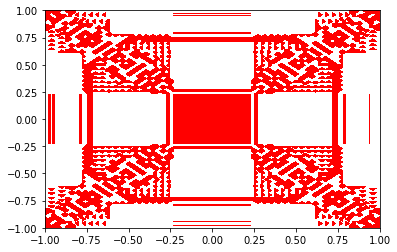

38


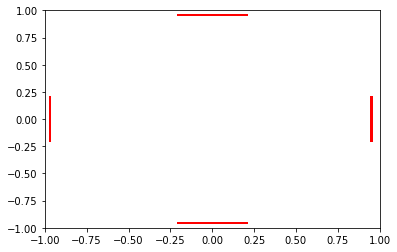

39


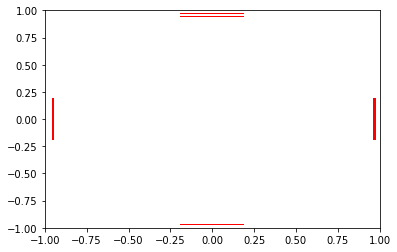

40


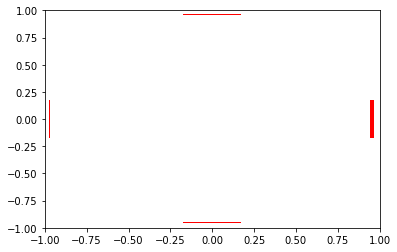

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


41


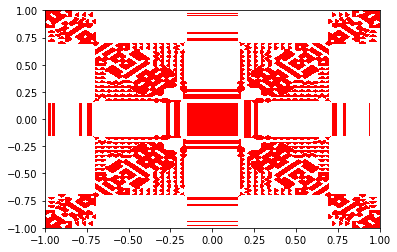

42


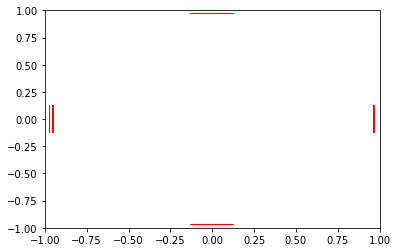

43


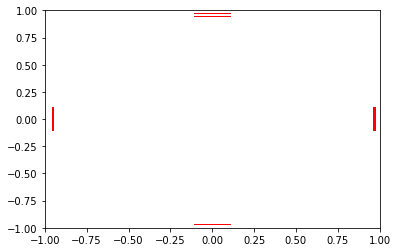

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars


44


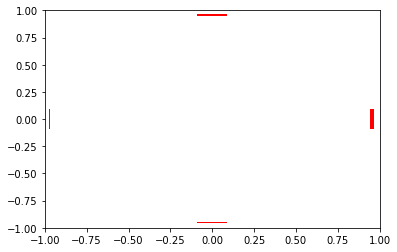

45


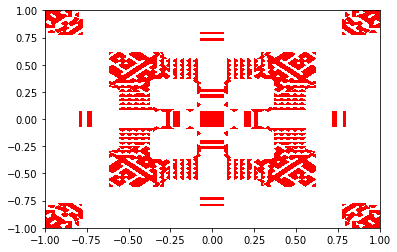

46


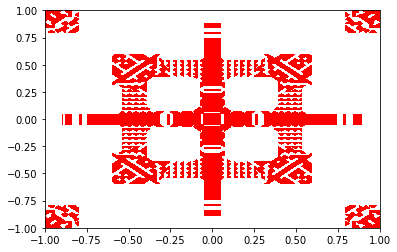

47


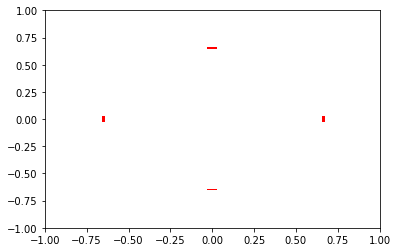

48


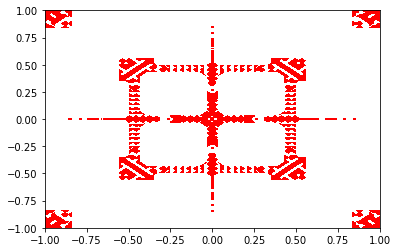

49


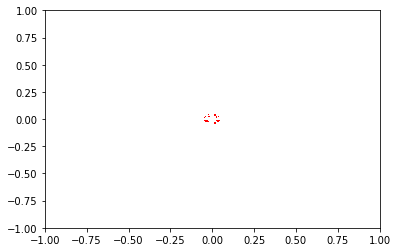

50


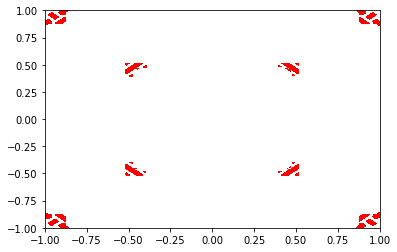

51


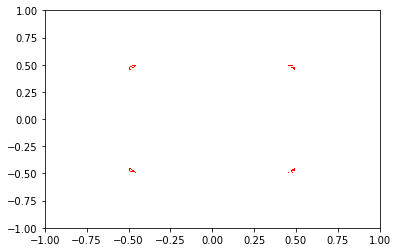

52


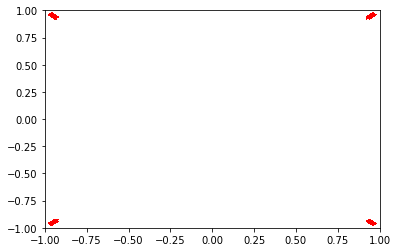

53


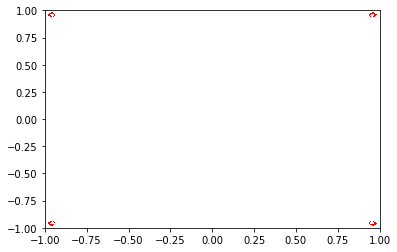

In [83]:
for t_i in range(time_steps-1):
    
    for x_i, y_i in np.argwhere(f_square((xv, yv)) < 1):
        u_x_ = u_x(u, x_i, y_i, t_i, dh)
        u_y_ = u_y(u, x_i, y_i, t_i, dh)
        u_xx_ = u_xx(u, x_i, y_i, t_i, dh)
        u_yy_ = u_yy(u, x_i, y_i, t_i, dh)
        u_xy_ = u_xy(u, x_i, y_i, t_i, dh)
        #print('Before:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
        #print(u_x_, u_y_, u_xx_, u_yy_, u_xy_)
        #print(u[x_i, y_i, t_i])
        u[x_i, y_i, t_i + 1] = u[x_i, y_i, t_i] \
                             + dt * (u_x_**2 + u_y_**2)**(1/6) \
                             * ( \
                                 (eps**2 + u_y_**2) * u_xx_ \
                             - 2*u_x_*u_y_*u_xy_ \
                             + (eps**2 + u_x_**2) * u_yy_ \
                             ) \
                             / ( \
                                 u_x_**2 \
                                 + u_y_**2 \
                                 + eps**2 \
                             ) ** (3/2)
        #print('After:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
    print(t_i)
    plt.clf()
    plt.contourf(xv, yv, u[:,:, t_i], colors=('w','r'), extend='min')
    plt.show()
               

In [93]:
space_steps = 50
u = np.ones((space_steps, space_steps, time_steps))*np.nan
xx = np.linspace(-1, 1, space_steps)
yy = np.linspace(-1, 1, space_steps)
xv, yv = np.meshgrid(xx, yy)
dh = 1 / space_steps

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: No contour levels were found within the data range.
  


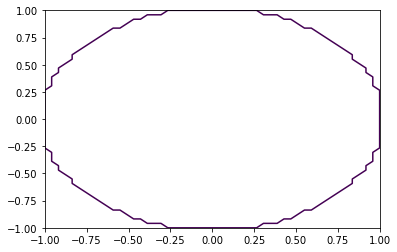

In [94]:
plt.clf()
set_circle = plt.contour(xv, yv, f_circle_((xv, yv)), 0)
plt.show()

In [95]:
# Circle
# Initial Condition (time) of the function u
for x_i, y_i in get_coords((xv, yv), set_circle.allsegs[0][0]):  # get_coords((xv, yv), set_square.allsegs[0][0]):
        u[x_i, y_i, 0] = 1
for x_i, y_i in list(np.ndindex(space_steps,space_steps)):  # get_coords((xv, yv), set_square.allsegs[0][0]):
        
        if not (get_coords((xv, yv), set_circle.allsegs[0][0]) == [x_i, y_i]).all(1).any():
            u[x_i, y_i, 0] = 0

# Boundary Condition (space) of the function u
for t_i in range(1, time_steps):
    for x_i, y_i in get_coords((xv, yv), set_circle.allsegs[0][0]):  # in get_coords((xv, yv), set_square.allsegs[0][0]):
            u[x_i, y_i, t_i] = 0

In [96]:
u[:, :, 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
from matplotlib.path import Path

In [98]:
p = Path(get_coords((xv, yv), set_circle.allsegs[0][0]))

In [99]:
x, y = np.meshgrid(np.arange(space_steps), np.arange(space_steps))
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T 

In [100]:
grid = p.contains_points(points)

In [101]:
mask = grid.reshape(space_steps, space_steps)

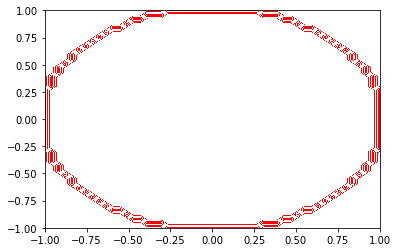

In [102]:
plt.clf()
plt.contourf(xv, yv, np.nan_to_num(u[:, :, 0]), colors=('w','r'), extend='min')
plt.show()

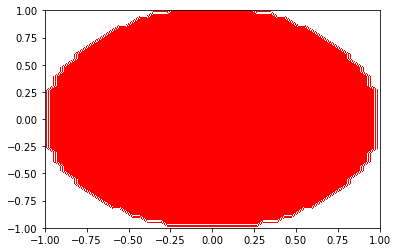

In [103]:
plt.clf()
plt.contourf(xv, yv, mask.astype(int), colors=('w','r'), extend='min')
plt.show()

In [104]:
def is_on_boundary_circle(coord):
    return (set_circle.allsegs[0][0] == coord).all(1).any()

In [105]:
is_on_boundary_circle([ 1,  6])

False

0


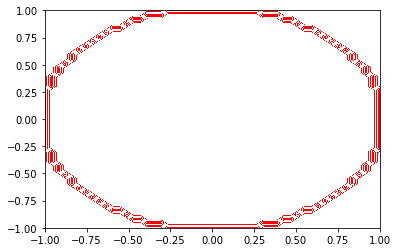

1


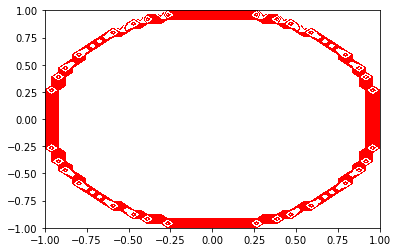

2


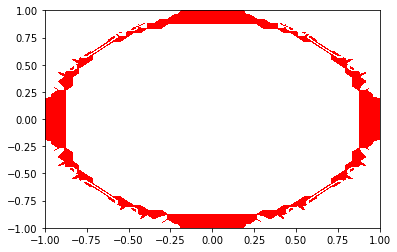

3


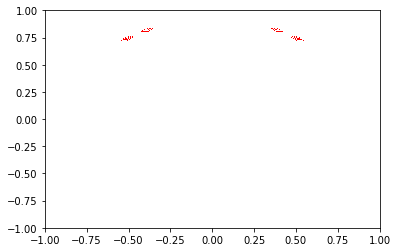

4


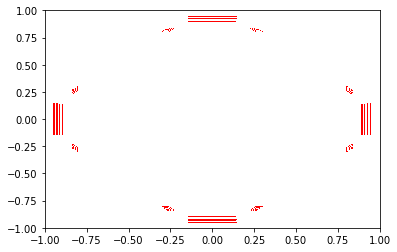

5


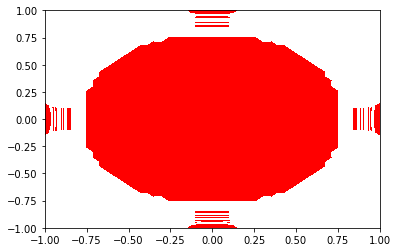

6


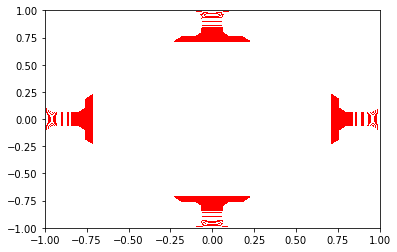

7


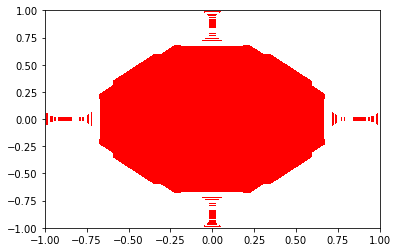

8


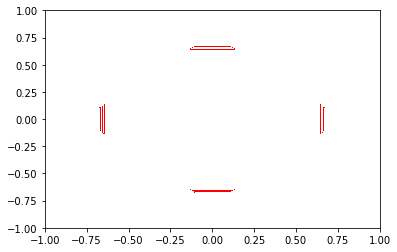

9


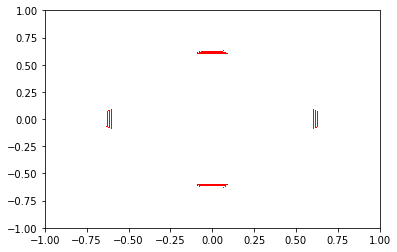

10


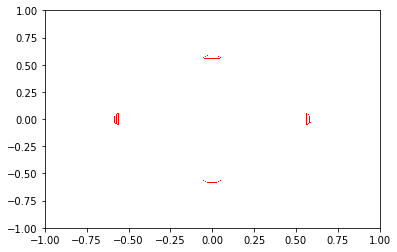

11


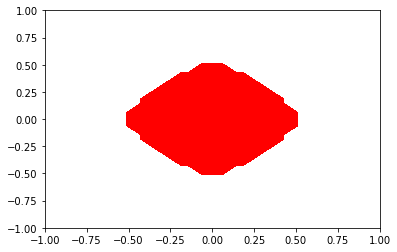

12


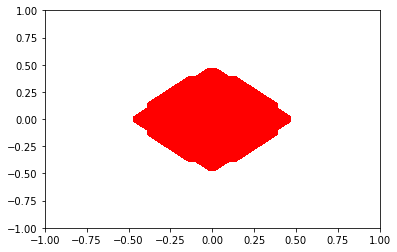

13


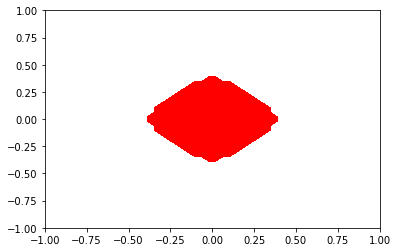

14


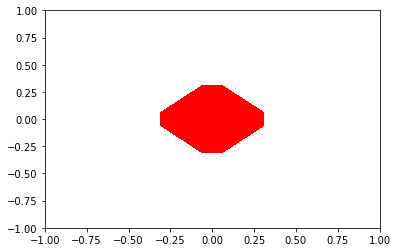

15


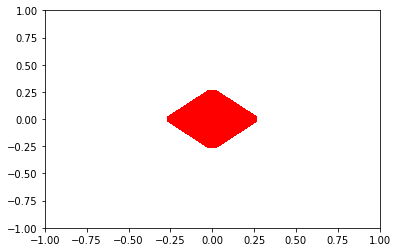

16


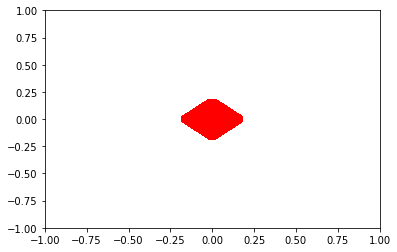

17


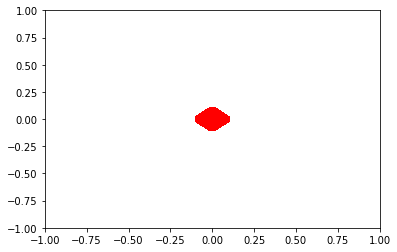

18


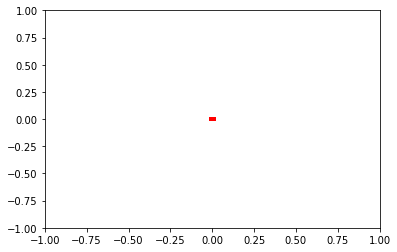

19


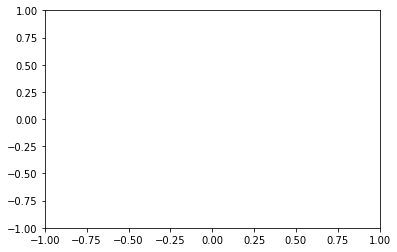

20


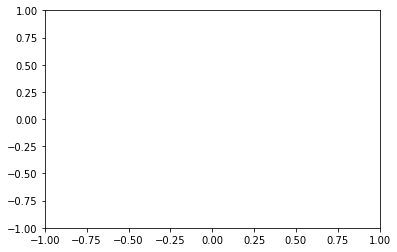

21


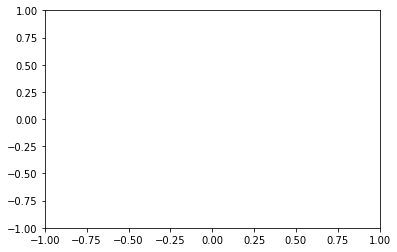

22


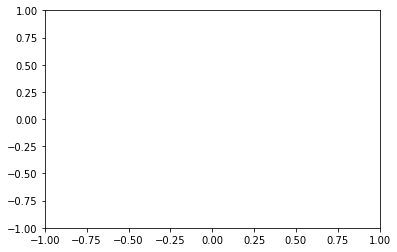

23


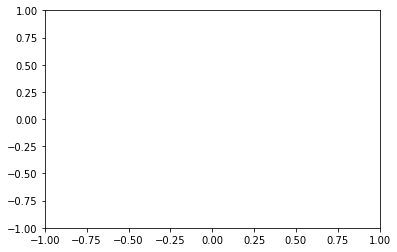

24


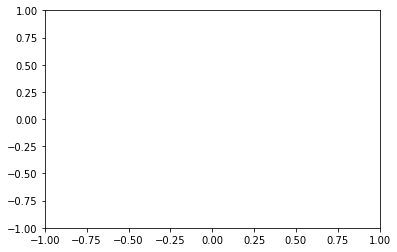

25


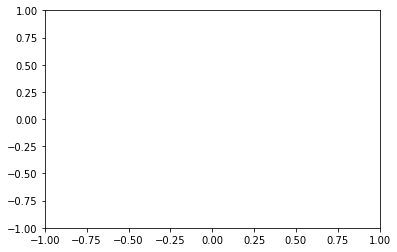

26


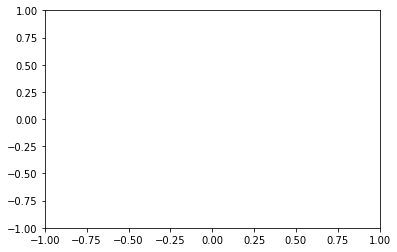

27


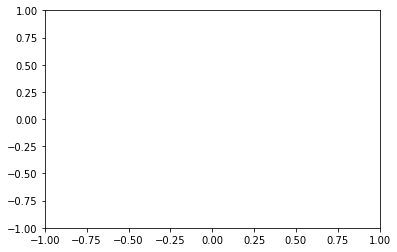

28


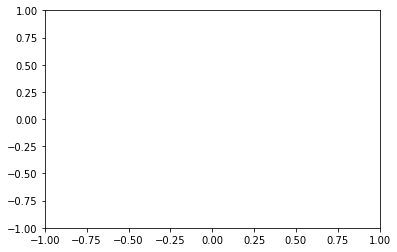

29


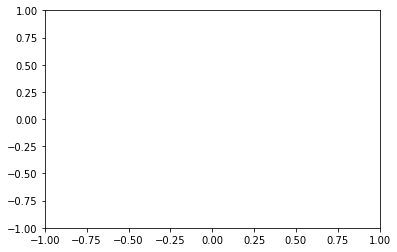

30


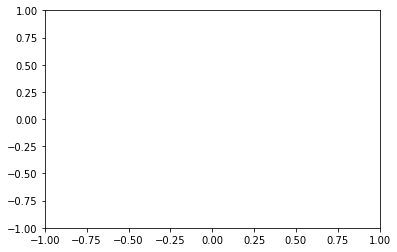

31


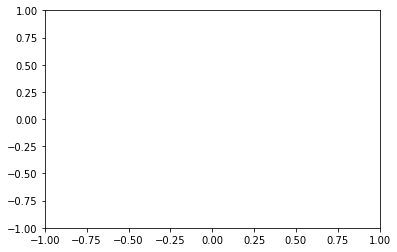

32


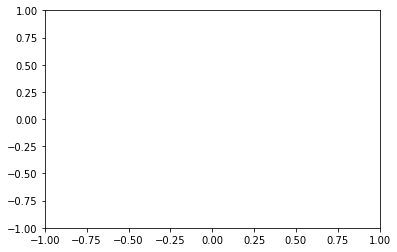

33


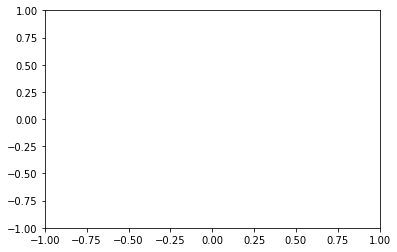

34


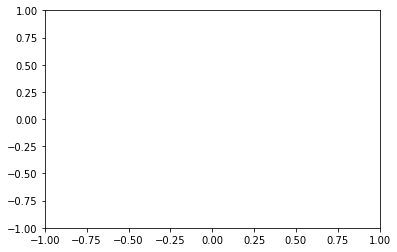

35


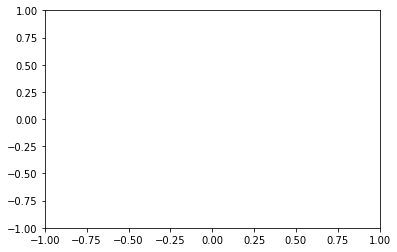

36


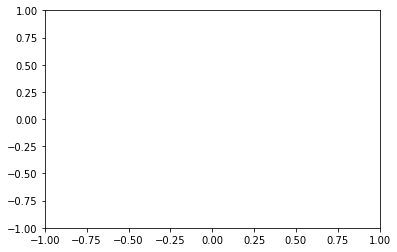

37


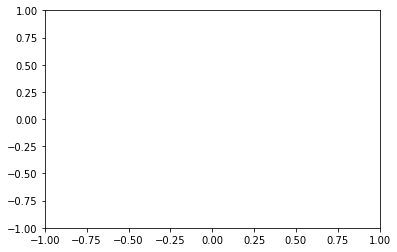

38


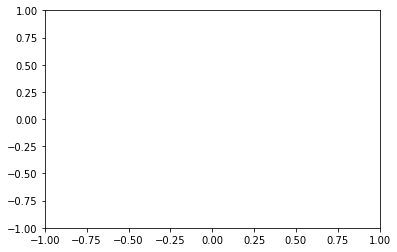

39


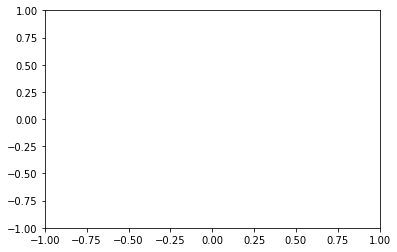

40


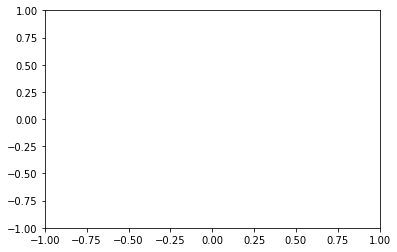

41


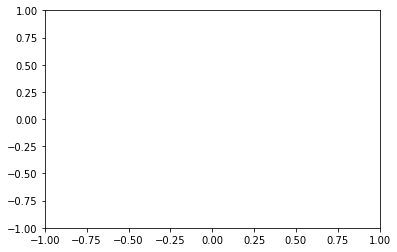

42


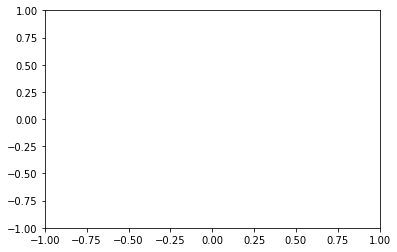

43


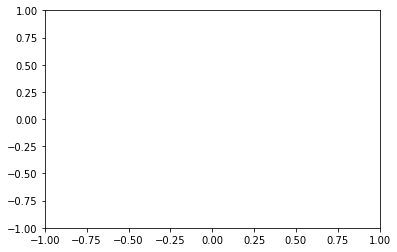

44


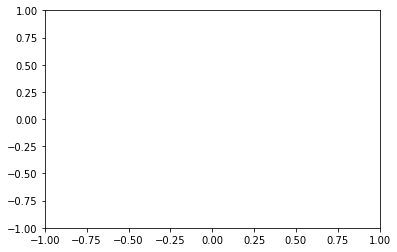

45


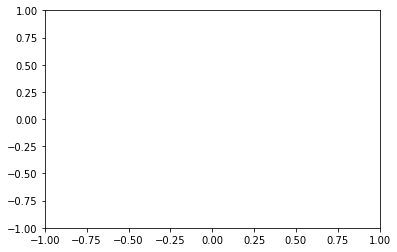

46


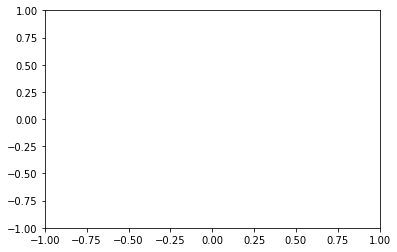

47


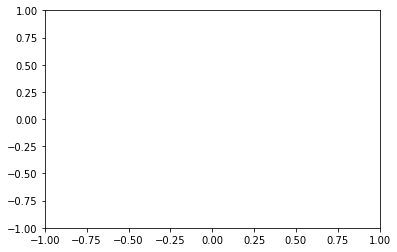

48


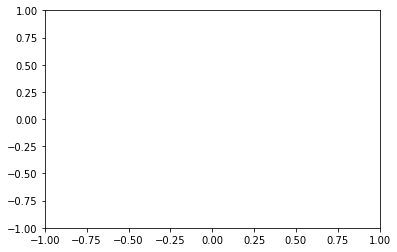

49


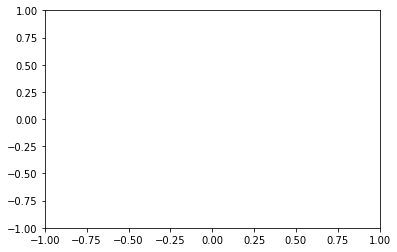

50


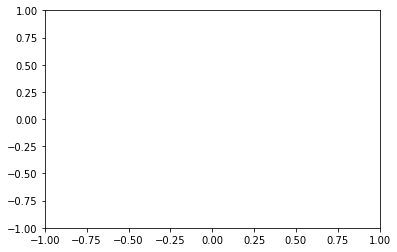

51


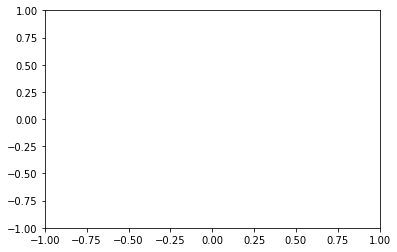

52


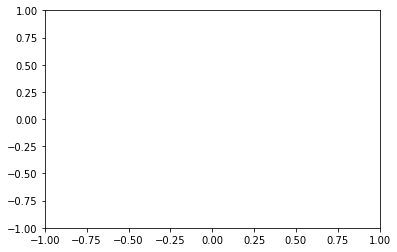

53


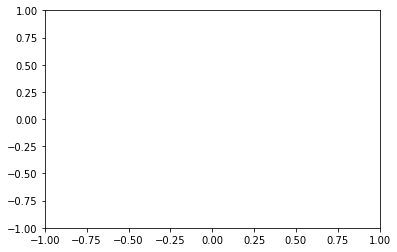

In [106]:
for t_i in range(time_steps-1):
    
    for x_i, y_i in np.argwhere(mask):
        if not is_on_boundary_circle([x_i, y_i]):
            try:
                u_x_ = u_x(u, x_i, y_i, t_i, dh)
                u_y_ = u_y(u, x_i, y_i, t_i, dh)
                u_xx_ = u_xx(u, x_i, y_i, t_i, dh)
                u_yy_ = u_yy(u, x_i, y_i, t_i, dh)
                u_xy_ = u_xy(u, x_i, y_i, t_i, dh)
                #print('Before:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
                #print(u_x_, u_y_, u_xx_, u_yy_, u_xy_)
                #print(u[x_i, y_i, t_i])
                u[x_i, y_i, t_i + 1] = u[x_i, y_i, t_i] \
                                     + dt * (u_x_**2 + u_y_**2)**(1/6) \
                                     * ( \
                                         (eps**2 + u_y_**2) * u_xx_ \
                                     - 2*u_x_*u_y_*u_xy_ \
                                     + (eps**2 + u_x_**2) * u_yy_ \
                                     ) \
                                     / ( \
                                         u_x_**2 \
                                         + u_y_**2 \
                                         + eps**2 \
                                     ) ** (3/2)
                #print('After:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
            except Exception as e:
                pass
    print(t_i)
    plt.clf()
    plt.contourf(xv, yv, u[:,:, t_i], colors=('w','r'), extend='min')
    plt.show()
               

We see that the family of surfaces evolves under mean curvature flow if the normal component of the velocity of which a point on the surface moves is given by the mean curvature of the surface. 

- Circle in our experiments is shrinking inward uniformly (since the mean curvature vector of a sphere points inward).
- Square is decomposing in four parts near the corners as different curvature of the corners vs the sides leades to a different velocity of those parts of the surface.

# Exercice 15

In [341]:
import glob
from PIL import Image
from matplotlib.pyplot import imshow
from scipy import signal

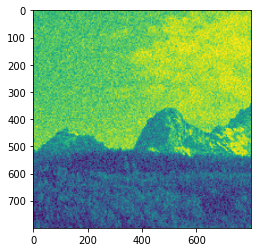

In [377]:
image = Image.open("Bilder-20200422/nockspitze_noise.jpg")
u_ij = np.asarray(image)[:800, :800]
imshow(u_ij)

In [378]:
u_ij.shape

(800, 800)

In [404]:
time_steps = 12
u = np.ones((u_ij.shape[0], u_ij.shape[1], time_steps))*np.nan

In [405]:
# Initial Condition
u[:, :, 0] = u_ij

In [406]:
boundary = [coord for coord in points if coord[0] in [0, u_ij.shape[0]-1] or coord[1] in [0, u_ij.shape[0]-1]]

In [407]:
interior = [coord for coord in points if not coord[0] in [0, u_ij.shape[0]-1] and not coord[1] in [0, u_ij.shape[0]-1]]

In [408]:
# Boundary Condition
for t_i in range(1, time_steps):
    for x_i, y_i in boundary:  # in get_coords((xv, yv), set_square.allsegs[0][0]):
            u[x_i, y_i, t_i] = 0

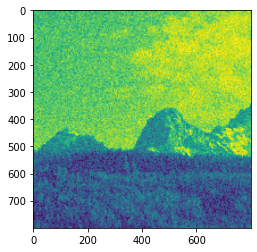

In [409]:
imshow((u[:, :, 0] - u[:, :, 0].min()) / (u[:, :, 0].max() - u[:, :, 0].min()))

In [410]:
x, y = np.meshgrid(np.arange(u_ij.shape[0]), np.arange(u_ij.shape[1]))
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T 

In [411]:
dt = 1e-2
eps = 100

0


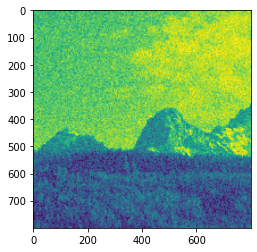

1


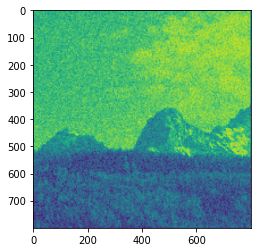

2


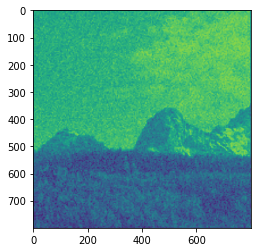

3


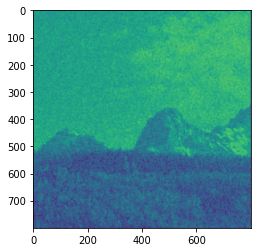

4


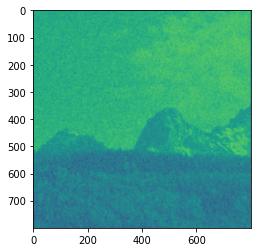

5


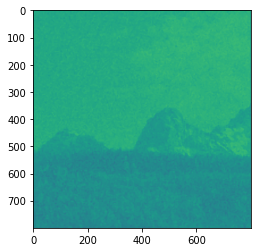

6


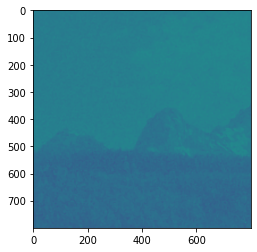

7


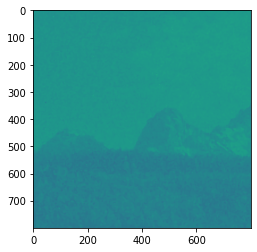

8


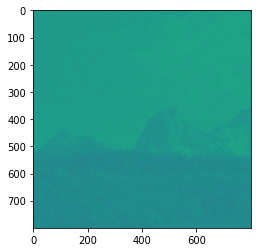

9


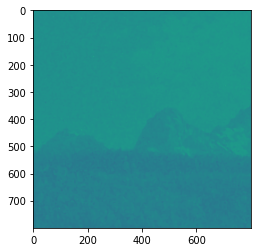

10


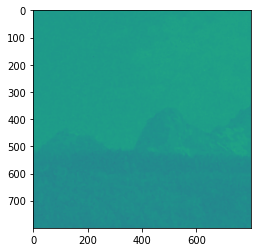

In [400]:
for t_i in range(time_steps-1):
    
    for x_i, y_i in interior:
        try:
            u_x_ = u_x(u, x_i, y_i, t_i, dh)
            u_y_ = u_y(u, x_i, y_i, t_i, dh)
            u_xx_ = u_xx(u, x_i, y_i, t_i, dh)
            u_yy_ = u_yy(u, x_i, y_i, t_i, dh)
            u_xy_ = u_xy(u, x_i, y_i, t_i, dh)
            #print('Before:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
            #print(u_x_, u_y_, u_xx_, u_yy_, u_xy_)
            #print(u[x_i, y_i, t_i])
            u[x_i, y_i, t_i + 1] = u[x_i, y_i, t_i] \
                                 + dt * (u_x_**2 + u_y_**2)**(1/6) \
                                 * ( \
                                     (eps**2 + u_y_**2) * u_xx_ \
                                 - 2*u_x_*u_y_*u_xy_ \
                                 + (eps**2 + u_x_**2) * u_yy_ \
                                 ) \
                                 / ( \
                                     u_x_**2 \
                                     + u_y_**2 \
                                     + eps**2 \
                                 ) ** (3/2)
            #print('After:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
        except Exception as e:
            pass
    print(t_i)
    plt.clf()
    imshow(u[:, :, t_i])
    plt.show()

# Exercice 16, 17

In [426]:
dt = 2e-4
eps = 100

0


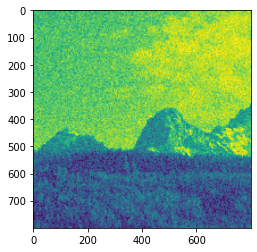

1


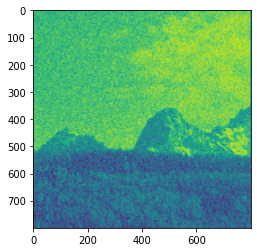

2


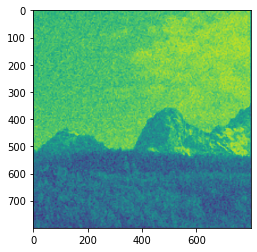

3


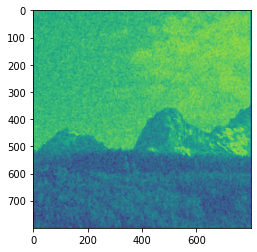

4


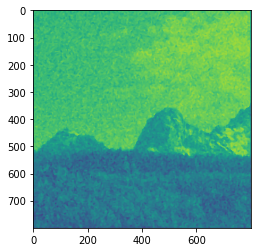

5


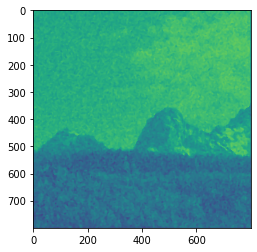

6


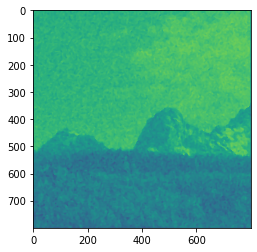

7


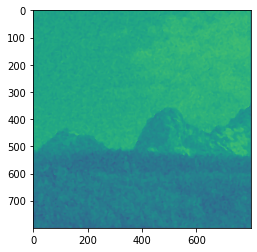

8


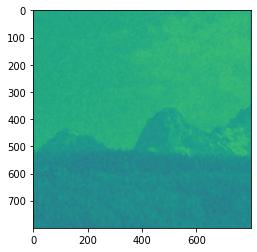

9


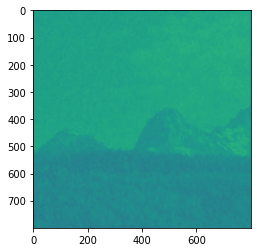

10


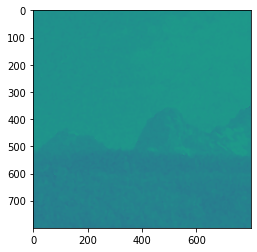

In [427]:
for t_i in range(time_steps-1):
    
    for x_i, y_i in interior:
        try:
            u_x_ = u_x(u, x_i, y_i, t_i, dh)
            u_y_ = u_y(u, x_i, y_i, t_i, dh)
            u_xx_ = u_xx(u, x_i, y_i, t_i, dh)
            u_yy_ = u_yy(u, x_i, y_i, t_i, dh)
            u_xy_ = u_xy(u, x_i, y_i, t_i, dh)
            #print('Before:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
            #print(u_x_, u_y_, u_xx_, u_yy_, u_xy_)
            #print(u[x_i, y_i, t_i])
            u[x_i, y_i, t_i + 1] = u[x_i, y_i, t_i] \
                                 + dt * (u_x_**2 + u_y_**2)**(1/2) \
                                 * ( \
                                     (eps**2 + u_y_**2) * u_xx_ \
                                 - 2*u_x_*u_y_*u_xy_ \
                                 + (eps**2 + u_x_**2) * u_yy_ \
                                 ) \
                                 / ( \
                                     u_x_**2 \
                                     + u_y_**2 \
                                     + eps**2 \
                                 ) ** (3/2)
            #print('After:', x_i, y_i, u[x_i, y_i, t_i], u[x_i, y_i, t_i + 1])
        except Exception as e:
            pass
    print(t_i)
    plt.clf()
    imshow(u[:, :, t_i])
    plt.show()

Both in case of AIMCM and MCM I expect to see the smoothing effect (therefore - similarity to the median filter) - noise is smoothed out, important features are more visible - which actually happens, but with different parameters for each algorithm